# Importing the library needed for spark to work and run in our environment

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import Row
from pyspark.ml.feature import Imputer
from pyspark.sql import SparkSession
from pyspark.sql import *
spark = SparkSession.builder.appName('CheckPyspark').getOrCreate()

# Loading Cleaned data

In [2]:
data=spark.read.parquet('./clean_dataV1.parquet')

In [3]:
data.printSchema()

root
 |-- ncodpers: double (nullable = true)
 |-- ind_empleado: string (nullable = true)
 |-- pais_residencia: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- ind_nuevo: float (nullable = true)
 |-- antiguedad: float (nullable = true)
 |-- indrel: float (nullable = true)
 |-- indrel_1mes: string (nullable = true)
 |-- tiprel_1mes: string (nullable = true)
 |-- indresi: string (nullable = true)
 |-- indext: string (nullable = true)
 |-- canal_entrada: string (nullable = true)
 |-- indfall: string (nullable = true)
 |-- tipodom: float (nullable = true)
 |-- cod_prov: float (nullable = true)
 |-- nomprov: string (nullable = true)
 |-- ind_actividad_cliente: float (nullable = true)
 |-- segmento: string (nullable = true)
 |-- ind_ahor_fin_ult1: integer (nullable = true)
 |-- ind_aval_fin_ult1: integer (nullable = true)
 |-- ind_cco_fin_ult1: integer (nullable = true)
 |-- ind_cder_fin_ult1: integer (nullable = true)
 |-- ind_cno_fin_ult1: integer (nullable = true)
 |-- in

# Visualizing the Distribution of sex column using Matplotlib Library

In [22]:
count_dict=data.cube('sexo').count()
count_dict=count_dict.rdd.collectAsMap()

In [23]:
del count_dict[None]

In [24]:
count_dict

{'H': 6195253, 'V': 7452056}

In [25]:
def vis_null_data(column_list,actual_count):
    '''
    args:
    1. column_list: < DICT > containing {key=column name ,value=null value count}
    2.actual_count: <INT> total records/rows
    '''
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(12,8))
    plt.bar('actual_count',actual_count)
    plt.bar(column_list.keys(),column_list.values())
    plt.title('Distribution of Sex')
    plt.legend(['Total Records','Count of Sex'])
    plt.show()

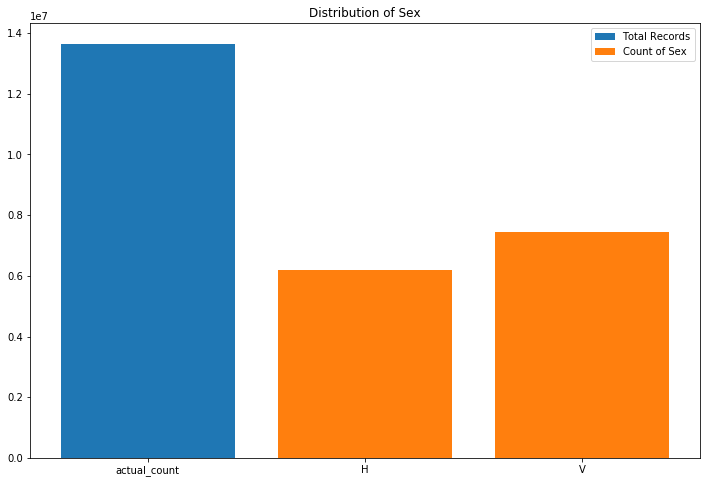

In [26]:
vis_null_data(count_dict,data.count())

# Visualizing the Distribution of Province name column using Matplotlib Library

In [80]:
def vis_data(column_list,actual_count):
    '''
    args:
    1. column_list: < DICT > containing {key=column name ,value=null value count}
    2.actual_count: <INT> total records/rows
    '''
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(18,14))
    plt.bar('actual_count',actual_count)
    plt.bar(column_list.keys(),column_list.values())
    plt.title('Distribution of Province name')
    plt.xticks(rotation=50)
    plt.legend(['Total Records','Count of Province name'])
    plt.show()

In [68]:
count_dict=data.cube('nomprov').count()
count_dict=count_dict.rdd.collectAsMap()

In [69]:
del count_dict[None]

In [70]:
count_dict

{'MALAGA': 367023,
 'GIRONA': 90538,
 'PALMAS, LAS': 235700,
 'SEGOVIA': 42341,
 'CUENCA': 57310,
 'ALBACETE': 114128,
 'LEON': 83003,
 'ASTURIAS': 265749,
 'SALAMANCA': 164238,
 'TERUEL': 22525,
 'CASTELLON': 104295,
 'BARCELONA': 1275219,
 'VALLADOLID': 238259,
 'BADAJOZ': 192996,
 'LUGO': 84962,
 'GIPUZKOA': 71567,
 'OURENSE': 84009,
 'PONTEVEDRA': 280026,
 'SORIA': 17660,
 'MURCIA': 396759,
 'AVILA': 38783,
 'BIZKAIA': 185888,
 'VALENCIA': 682304,
 'ALAVA': 37704,
 'LERIDA': 79059,
 'SANTA CRUZ DE TENERIFE': 70968,
 'RIOJA, LA': 85202,
 'GUADALAJARA': 64618,
 'ALMERIA': 60291,
 'GRANADA': 178562,
 'CORDOBA': 144679,
 'ZARAGOZA': 342543,
 'HUELVA': 122283,
 'CORUÑA, A': 429322,
 'CADIZ': 294684,
 'SEVILLA': 605164,
 'NAVARRA': 88618,
 'BALEARS, ILLES': 124933,
 'ZAMORA': 50927,
 'JAEN': 64363,
 'MADRID': 4503191,
 'TOLEDO': 183067,
 'MELILLA': 9460,
 'BURGOS': 97188,
 'CEUTA': 7218,
 'HUESCA': 40181,
 'CACERES': 129912,
 'PALENCIA': 49282,
 'CIUDAD REAL': 119390,
 'CANTABRIA': 15570

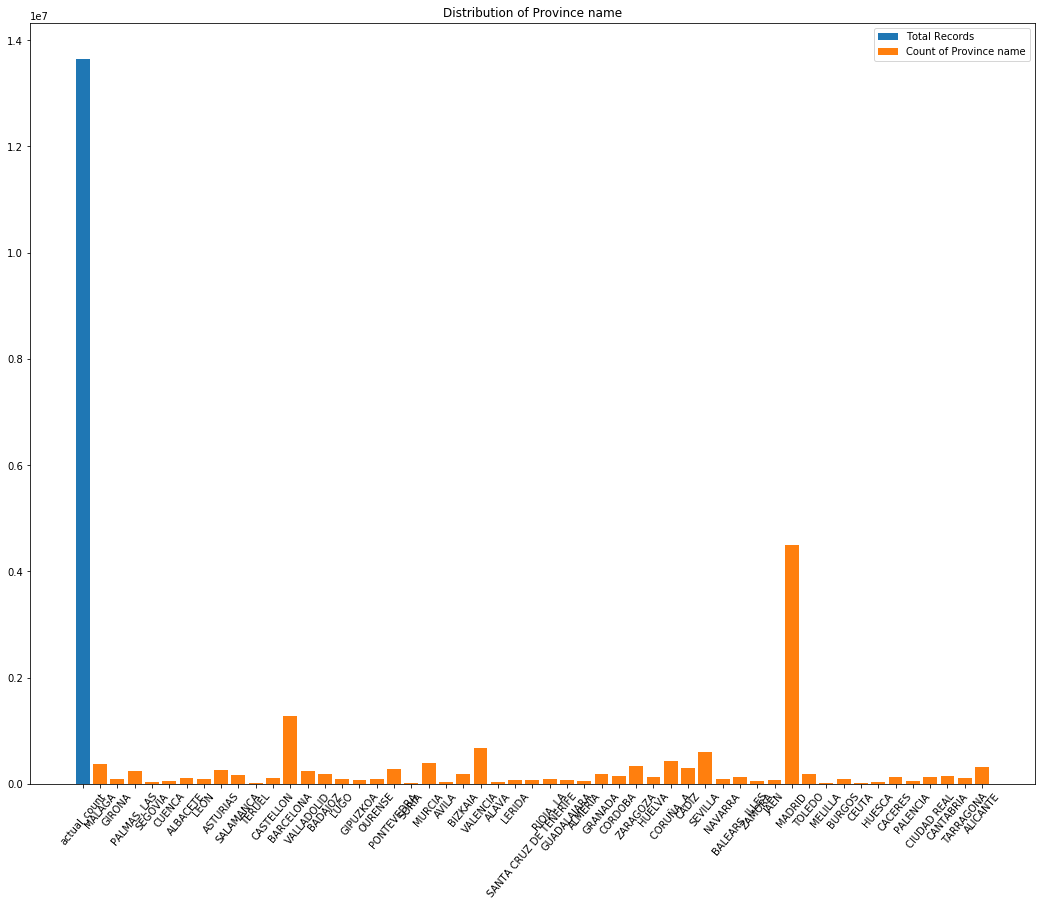

In [81]:
vis_data(count_dict,data.count())

# Visualizing the Distribution of Customer type column using Matplotlib Library

In [32]:
def vis_data(column_list,actual_count):
    '''
    args:
    1. column_list: < DICT > containing {key=column name ,value=null value count}
    2.actual_count: <INT> total records/rows
    '''
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=50)
    plt.bar('actual_count',actual_count)
    plt.bar(column_list.keys(),column_list.values())
    plt.title('Distribution of Customer type')
    plt.legend(['Total Records','Count of Customer type'])
    plt.show()

In [33]:
count_dict=data.cube('indrel_1mes').count()
count_dict=count_dict.rdd.collectAsMap()

In [34]:
del count_dict[None]

In [35]:
count_dict

{'4': 83,
 'P': 874,
 '3': 1570,
 '1': 4357298,
 '2.0': 740,
 '1.0': 9283164,
 '3.0': 2780,
 '4.0': 223,
 '2': 577}

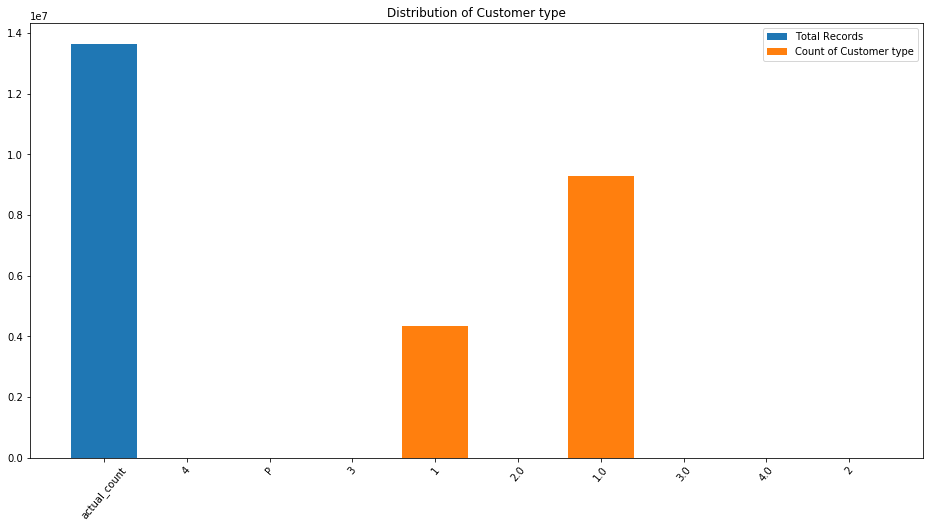

In [36]:
vis_data(count_dict,data.count())

# Visualizing the Distribution of Customer relation type column using Matplotlib Library

In [41]:
def vis_data(column_list,actual_count):
    '''
    args:
    1. column_list: < DICT > containing {key=column name ,value=null value count}
    2.actual_count: <INT> total records/rows
    '''
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=50)
    plt.bar('actual_count',actual_count)
    plt.bar(column_list.keys(),column_list.values())
    plt.title('Distribution of Customer relation type ')
    plt.legend(['Total Records','Count of Customer relation type '])
    plt.show()

In [37]:
count_dict=data.cube('tiprel_1mes').count()
count_dict=count_dict.rdd.collectAsMap()

In [38]:
del count_dict[None]

In [39]:
count_dict

{'I': 7454656, 'P': 4656, 'A': 6187123, 'R': 870, 'N': 4}

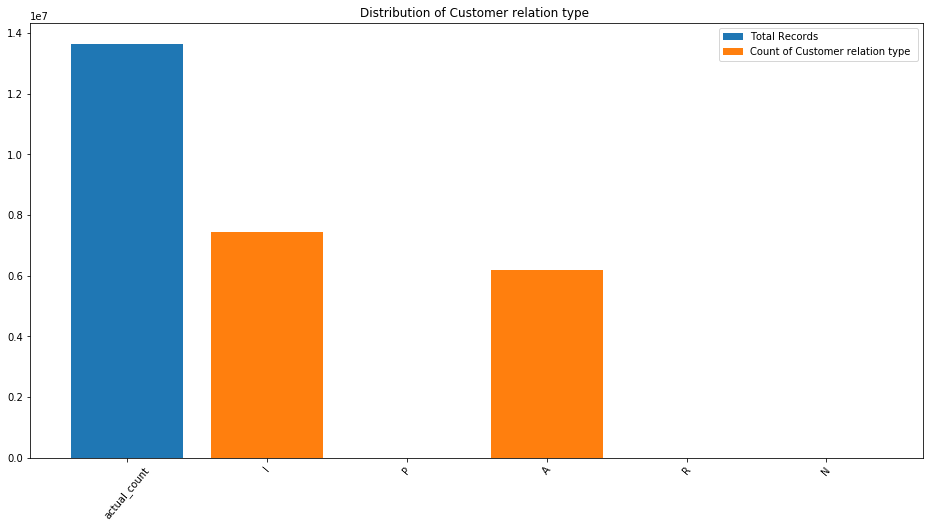

In [42]:
vis_data(count_dict,data.count())

# Visualizing the Distribution of Foreigner index column using Matplotlib Library

In [54]:
def vis_data(column_list,actual_count):
    '''
    args:
    1. column_list: < DICT > containing {key=column name ,value=null value count}
    2.actual_count: <INT> total records/rows
    '''
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=50)
    plt.bar('actual_count',actual_count)
    plt.bar(column_list.keys(),column_list.values())
    plt.title('Distribution of Foreigner index')
    plt.legend(['Total Records','Count of Foreigner index'])
    plt.show()



In [50]:
count_dict=data.cube('indext').count()
count_dict=count_dict.rdd.collectAsMap()

In [51]:
del count_dict[None]

In [52]:
count_dict

{'S': 644736, 'N': 13002573}

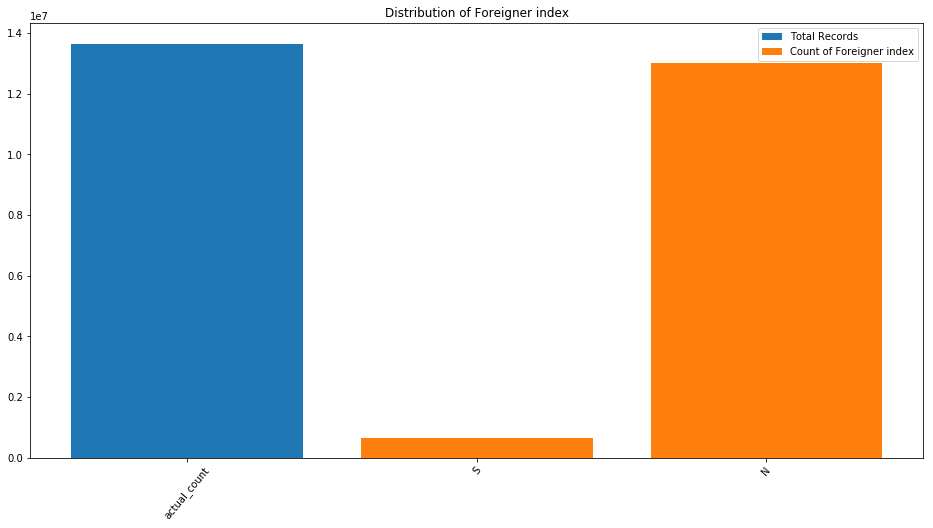

In [55]:
vis_data(count_dict,data.count())